# Densenet201 Model 3a
## Preprocessing method: ImageDataGenerator()
## Image size: (224, 224) 
## Images: RGB
## Frozen pretrained layers
## Image transformation

In [1]:
import pandas as pd
import numpy as np
import io
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
from keras import backend as K
K.clear_session()

In [3]:
path_training = 'gender_images/Training/'
path_validation = 'gender_images/Validation/'

In [4]:
image_size = (224, 224)
batch_size = 64

datagen_transform = ImageDataGenerator(
    rescale =1./255,
    validation_split=.2,
    rotation_range=20,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

datagen_val = ImageDataGenerator(
    rescale = 1./255,
)

train_ds = datagen_transform.flow_from_directory(
    path_training,
    seed=1993,
    target_size=image_size,
    batch_size=batch_size,
    classes=['female','male'],
    shuffle=True,
    color_mode="rgb"
)

val_ds = datagen_transform.flow_from_directory(
    path_validation,
    seed=1993,
    target_size=image_size,
    batch_size=batch_size,
    classes=['female','male'],
    shuffle=True,
    color_mode="rgb"
)

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [5]:
DN201_model = keras.applications.DenseNet201(weights='imagenet', include_top=True)
DN201_model.trainable = False

# Model layers
input_tensor = tf.keras.layers.Input(shape=(224, 224, 3))
x = DN201_model(input_tensor)
out = keras.layers.Dense(2, activation='softmax')(x)

# Set early stopping after certain number of epochs
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
epochs=1000     # Set epochs

# Generate model
model = keras.Model(inputs = input_tensor, outputs = out)
model.compile(optimizer=keras.optimizers.Adam(1e-2),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 densenet201 (Functional)    (None, 1000)              20242984  
                                                                 
 dense (Dense)               (None, 2)                 2002      
                                                                 
Total params: 20,244,986
Trainable params: 2,002
Non-trainable params: 20,242,984
_________________________________________________________________


In [6]:
mod_fit = model.fit(train_ds, 
                      epochs=epochs, 
                      validation_data=val_ds,
                      callbacks=[callback])

Epoch 1/1000
735/735 [==============================] - 361s 480ms/step - loss: 0.5761 - accuracy: 0.7336 - val_loss: 0.5166 - val_accuracy: 0.7650
Epoch 2/1000
735/735 [==============================] - 358s 488ms/step - loss: 0.5093 - accuracy: 0.7629 - val_loss: 0.4901 - val_accuracy: 0.7771
Epoch 3/1000
735/735 [==============================] - 363s 494ms/step - loss: 0.4932 - accuracy: 0.7739 - val_loss: 0.4734 - val_accuracy: 0.7906
Epoch 4/1000
735/735 [==============================] - 364s 495ms/step - loss: 0.4778 - accuracy: 0.7857 - val_loss: 0.4639 - val_accuracy: 0.7909
Epoch 5/1000
735/735 [==============================] - 362s 493ms/step - loss: 0.4714 - accuracy: 0.7884 - val_loss: 0.4605 - val_accuracy: 0.7996
Epoch 6/1000
735/735 [==============================] - 361s 492ms/step - loss: 0.4683 - accuracy: 0.7907 - val_loss: 0.4528 - val_accuracy: 0.8020
Epoch 7/1000
735/735 [==============================] - 358s 487ms/step - loss: 0.4643 - accuracy: 0.7940 - val_

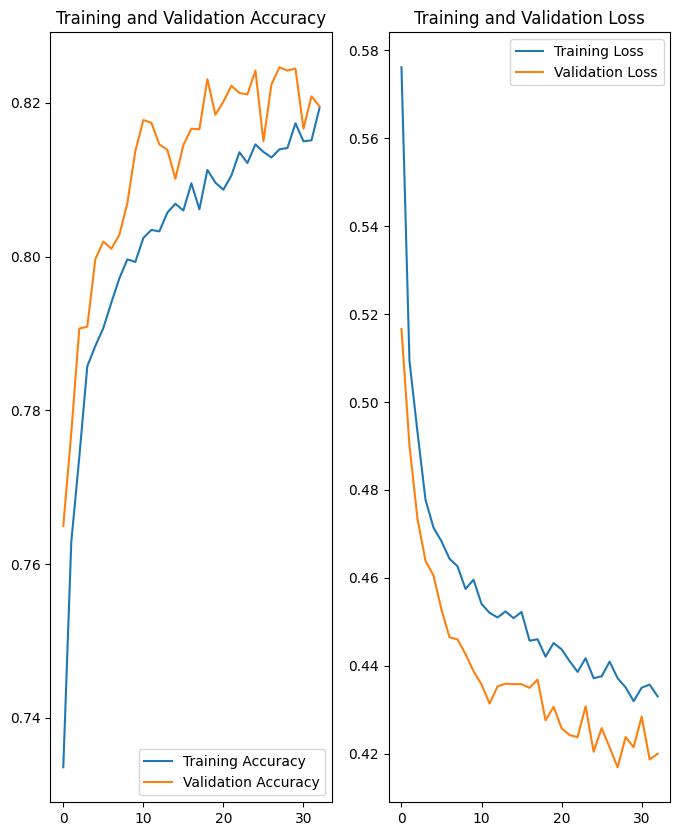

In [7]:
acc= mod_fit.history['accuracy']
val_acc = mod_fit.history['val_accuracy']

loss = mod_fit.history['loss']
val_loss = mod_fit.history['val_loss']

epochs_range = range(0, 33)

plt.figure(figsize=(8, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [8]:
print(str('Top Training Accuracy: ') + str(round(max(acc),4)))
print(str('Top Validation Accuracy: ') + str(round(max(val_acc),4)))

Top Training Accuracy: 0.8193
Top Validation Accuracy: 0.8246


In [9]:
model.save('GC weights/Frozen/mod3a-RGB/mod3a_RGB_frozen.h5')